# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import static_utils

%matplotlib inline

# Constants and Paths

In [2]:
# Main data paths for each catheter (manually input)
parent_path = '../data/processed'
main_path_222 = parent_path + '/static/trackTest-17Aug2021-C222-Y0/'
main_path_231 = parent_path + '/static/trackTest-15Dec2021-C231-Y0/'
main_path_306 = parent_path + '/static/trackTest-13Dec2021-C306-Y0/'

main_path = [main_path_222, main_path_231, main_path_306]

# Where you would like to save the heatmaps (manually input)
heatmap_path = '../reports/figures/static/Y45mm/'

Gt_filename = '1GroundTruthCoords.csv'

geometry_index = 1

# Error Heatmaps for Y= 45 mm

For each sequence and localization algorithm of interest, plot the heatmap of average tip errors at each position. Each position has recordings from three catheters.

Tip Tracking Error @ Y = 45mm sequence SRI_Original, algorithm centroid_around_peak


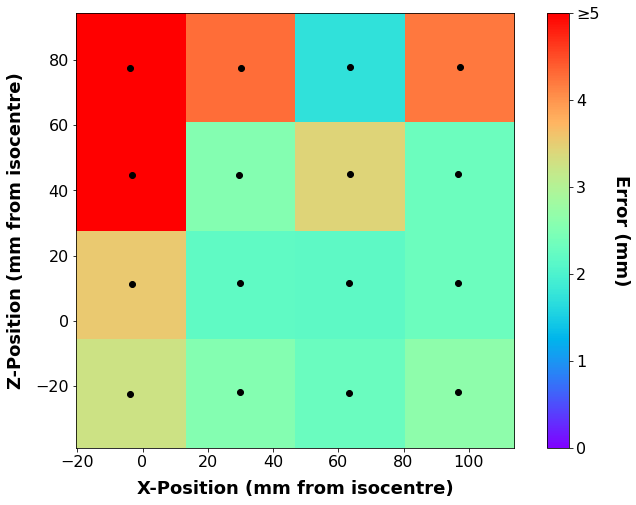

Tip Tracking Error @ Y = 45mm sequence SRI_Original, algorithm jpng


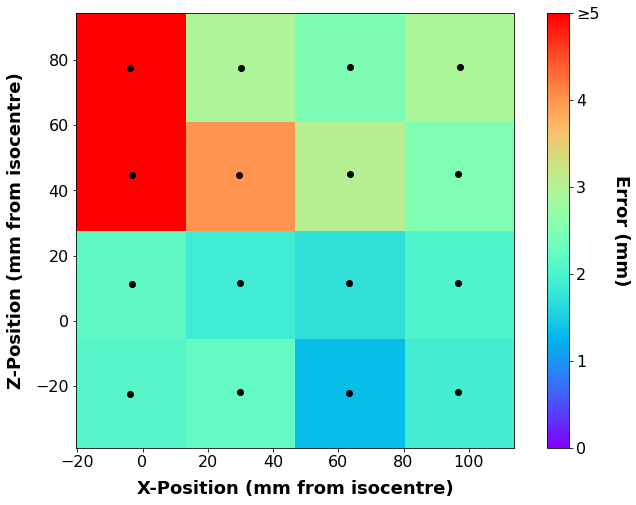

Tip Tracking Error @ Y = 45mm sequence FH512_noDither_gradSpoiled, algorithm centroid_around_peak


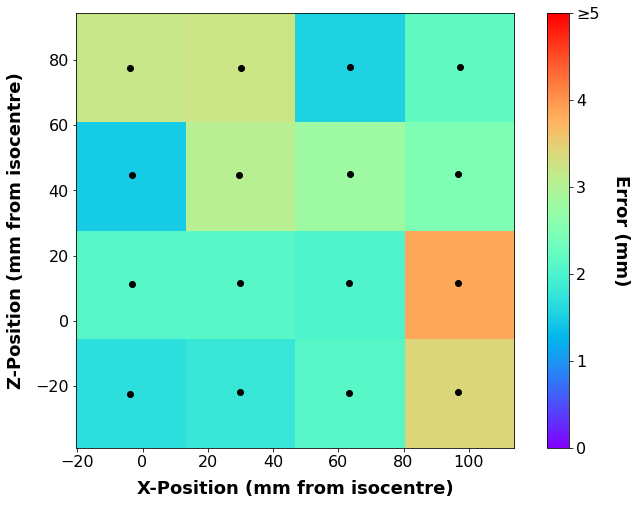

Tip Tracking Error @ Y = 45mm sequence FH512_noDither_gradSpoiled, algorithm jpng


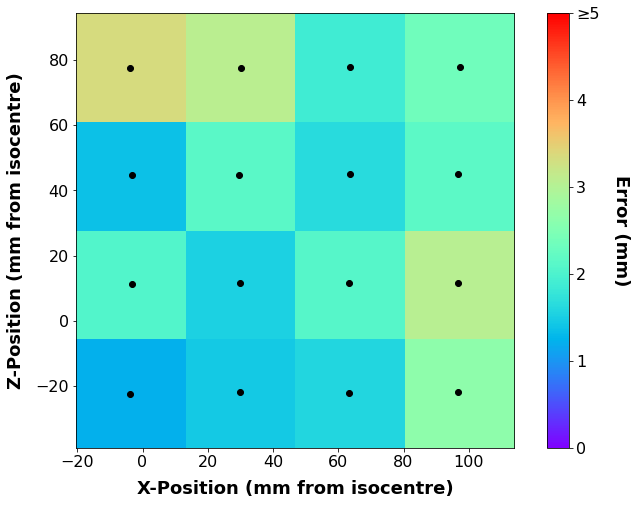

In [3]:
sequences = ['SRI_Original', 'FH512_noDither_gradSpoiled']
algorithms = ['centroid_around_peak', 'jpng']

for seq in sequences:
    for alg in algorithms:
        path_dct = static_utils.get_catheter_data(main_path, seq, alg, Gt_filename, geometry_index)
        # Average the error
        avg_all_caths = (path_dct[main_path_222] + path_dct[main_path_231] + path_dct[main_path_306]) / 3
        avg_err = avg_all_caths[:, 2]
        my_data = np.array([avg_all_caths[:, 0], avg_all_caths[:, 1], avg_err]).T
        
        X = my_data[:, 0]
        Y = my_data[:, 1]
        Z = my_data[:, 2]

        heatmap = static_utils.nonuniform_imshow(X, Y, Z)
        plt.gca().invert_yaxis()
        plt.xlabel('X-Position (mm from isocentre)', fontsize = 18, fontweight = 'bold', labelpad = 10)
        plt.ylabel('Z-Position (mm from isocentre)', fontsize = 18, fontweight = 'bold', labelpad = 10)
        plt.xticks(fontsize = 16)
        plt.yticks(fontsize = 16)
        print('Tip Tracking Error @ Y = 45mm sequence {0}, algorithm {1}'.format(seq, alg))
        cbar = plt.colorbar(heatmap)
        cbar.ax.set_yticklabels(['0', '1', '2', '3', '4', '\u2265' + '5'])
        cbar.ax.get_yaxis().labelpad = 30
        cbar.ax.tick_params(labelsize = 16) 
        cbar.ax.set_ylabel('Error (mm)', rotation = 270, fontsize = 18, fontweight = 'bold')
        
        if not os.path.isdir('{0}'.format(heatmap_path)):
            os.makedirs('{0}'.format(heatmap_path))

        plt.savefig('{0}{1}_{2}_heatmap.png'.format(heatmap_path, seq, alg), dpi=300)
        plt.show()
        